# Analysis of Simulation Data

#### Load Data

In [28]:
# import data
import numpy as np
import matplotlib.pyplot as plt
import os

# Load the beta values
run = "wolf_temperature_v2"
beta_list = []
with open(f"data/{run}/beta_list.txt", "r") as f:
    for line in f:
        beta_list.append(float(line.strip()))

print(f"Beta values: {beta_list}")

# Load simulation data for each beta
simulation_data = {}
for beta in beta_list:
    try:
        data = np.load(f"data/{run}/mag_eng_beta_{beta}.npz")
        simulation_data[beta] = {
            # 'states': data['states'],
            'energys': data['energys'], 
            'magnetizations': data['magnetizations']
        }
        print(f"Loaded data for beta = {beta}: {len(data['energys'])} steps")
    except FileNotFoundError:
        print(f"Data file for beta = {beta} not found")

print(f"\nSuccessfully loaded data for {len(simulation_data)} beta values")

Beta values: [0.1, 0.2, 0.3, 0.4, 0.41, 0.42, 0.43, 0.44, 0.4407, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.6]
Loaded data for beta = 0.1: 100000 steps
Loaded data for beta = 0.2: 100000 steps
Loaded data for beta = 0.3: 100000 steps
Loaded data for beta = 0.4: 100000 steps
Loaded data for beta = 0.41: 100000 steps
Loaded data for beta = 0.42: 100000 steps
Loaded data for beta = 0.43: 100000 steps
Loaded data for beta = 0.44: 100000 steps
Loaded data for beta = 0.4407: 100000 steps
Loaded data for beta = 0.45: 100000 steps
Loaded data for beta = 0.46: 100000 steps
Loaded data for beta = 0.47: 100000 steps
Loaded data for beta = 0.48: 100000 steps
Loaded data for beta = 0.49: 100000 steps
Loaded data for beta = 0.5: 100000 steps
Loaded data for beta = 0.6: 100000 steps

Successfully loaded data for 16 beta values


### Autocorrelation Function & Integrated Autocorrelation Time

In [29]:
def autocorrelation(data):
    '''
    Compute the autocorrelation function of a 1D array.
    '''
    n = len(data)
    data_mean = np.mean(data)
    data_var = np.var(data)
    autocorr = np.correlate(data - data_mean, data - data_mean, mode='full')[n-1:] / (data_var * n)
    return autocorr

In [30]:
def integrated_autocorrelation_time(autocorr):
    '''
    Compute the integrated autocorrelation time from the autocorrelation function.
    '''
    W = 3*np.where(autocorr < 0)[0][0]     # three times first negative point
    tau_int = 1 + 2 * np.sum(autocorr[1:W])
    return tau_int

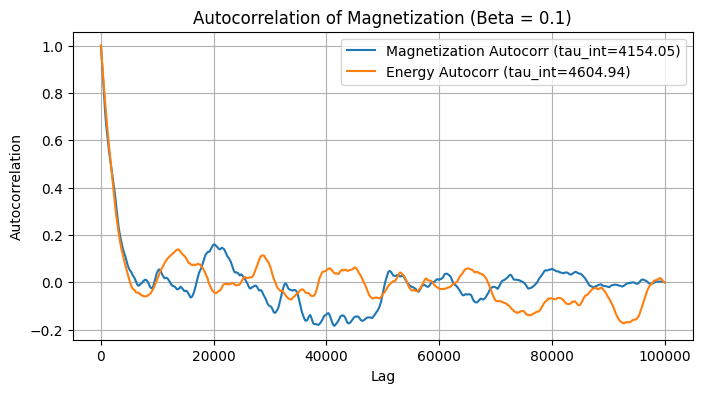

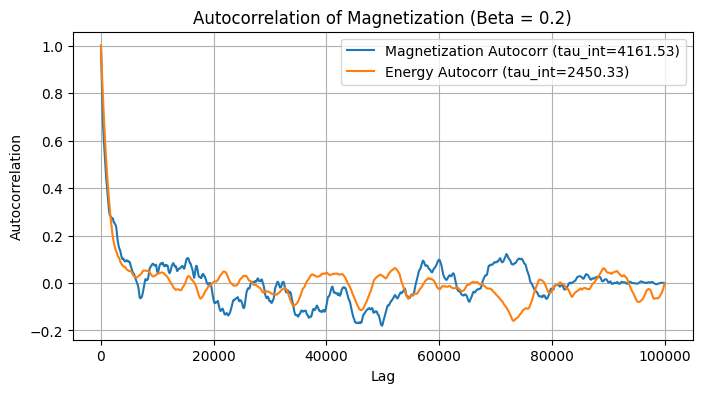

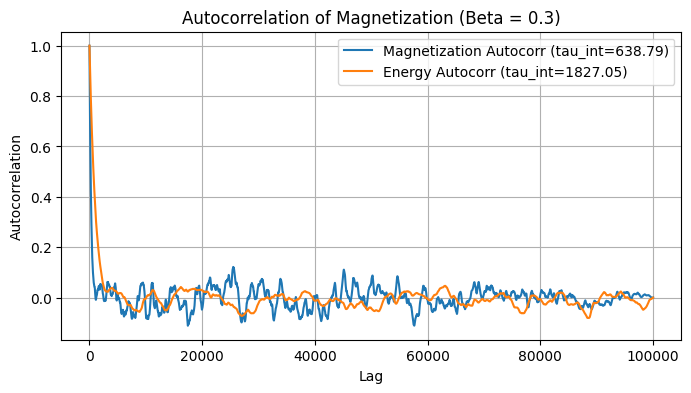

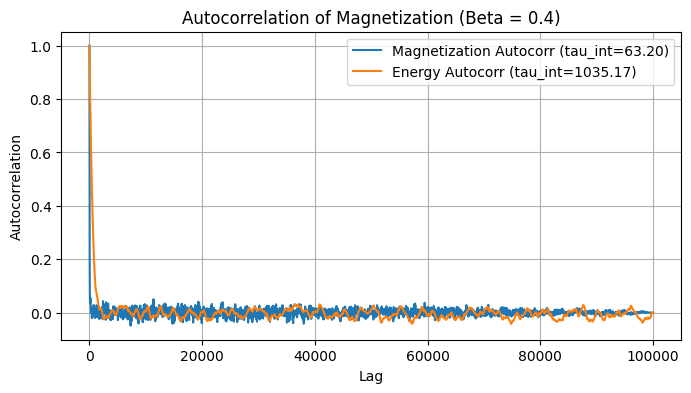

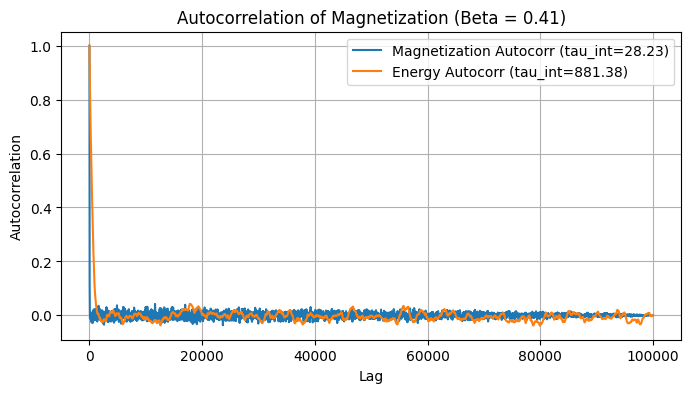

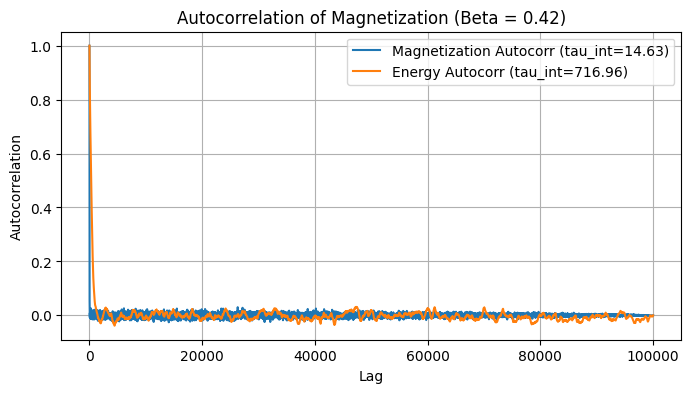

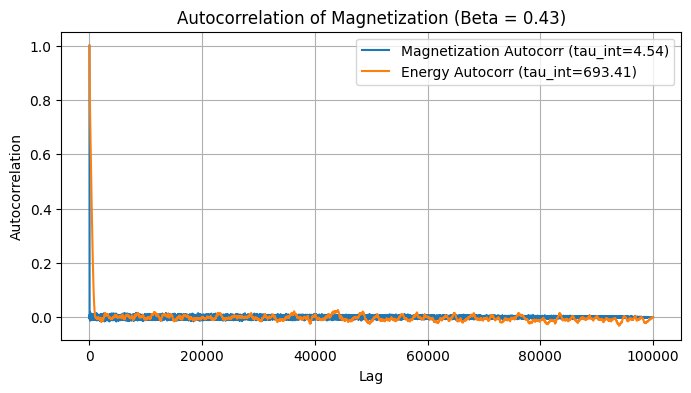

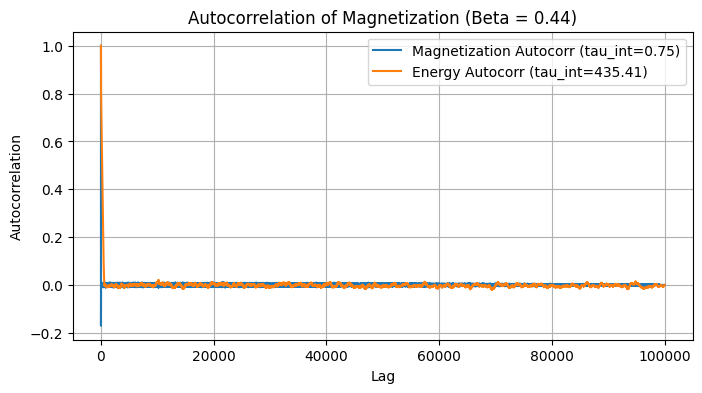

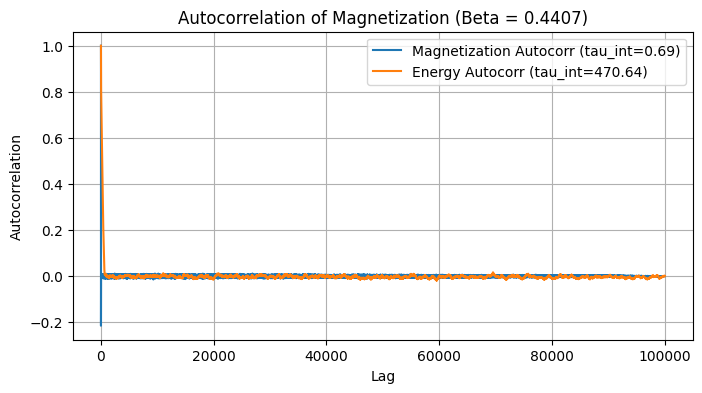

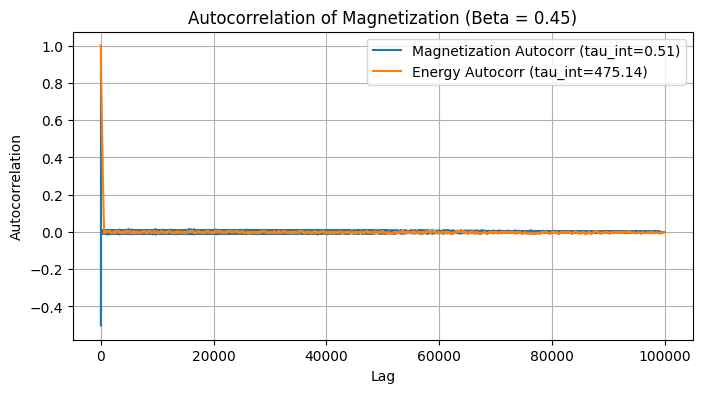

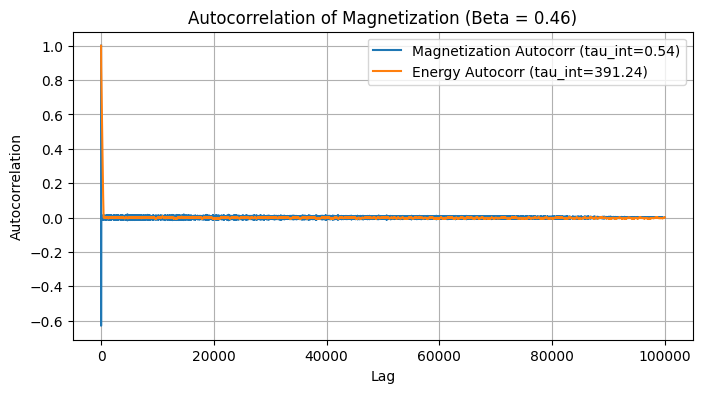

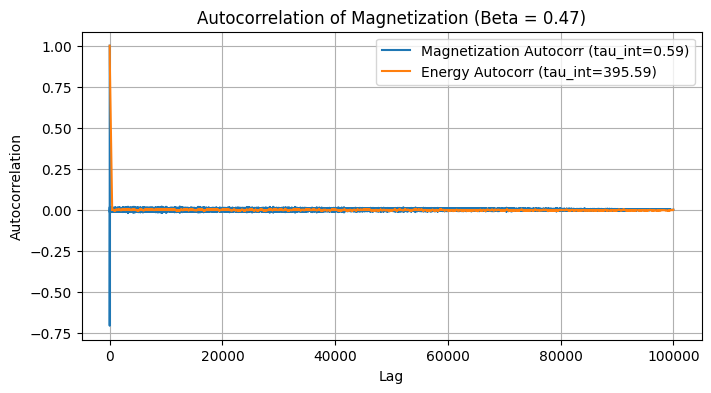

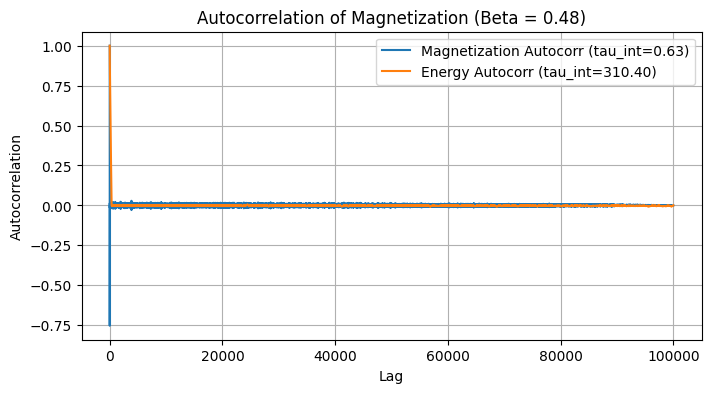

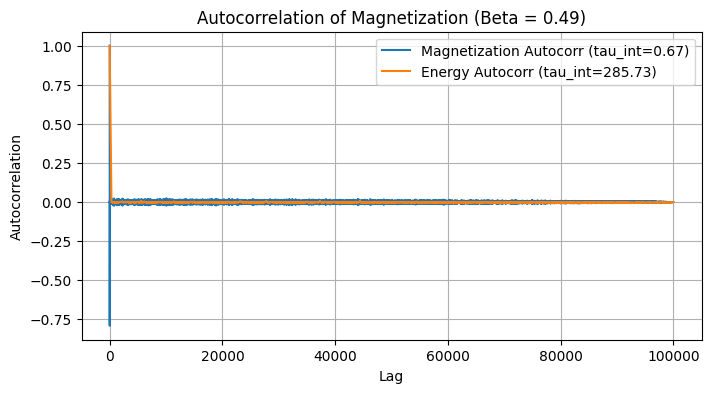

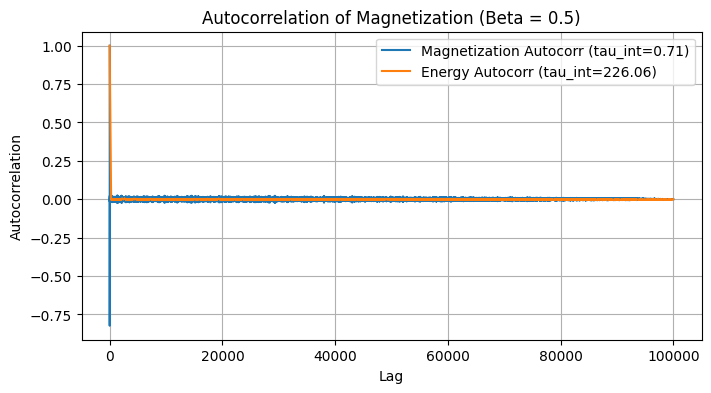

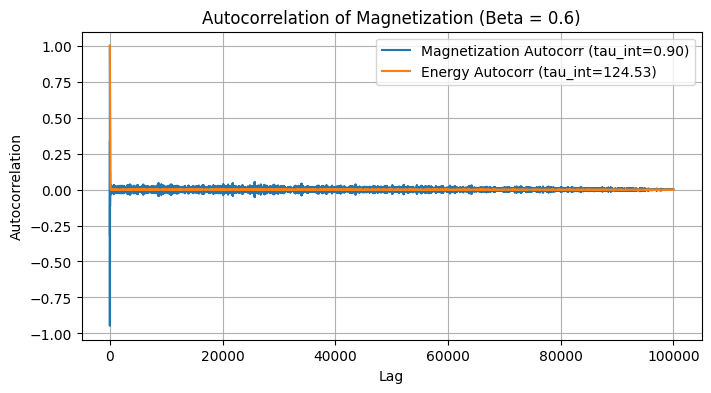

In [31]:
tau_int_mag_ls = []
tau_int_energy_ls = []
# Compute and plot autocorrelation for each beta
for beta, data in simulation_data.items():
    magnetizations = data['magnetizations']
    energys = data['energys']
    
    autocorr_mag = autocorrelation(magnetizations)
    autocorr_energy = autocorrelation(energys)

    tau_int_mag = integrated_autocorrelation_time(autocorr_mag)
    tau_int_energy = integrated_autocorrelation_time(autocorr_energy)
    tau_int_mag_ls.append(tau_int_mag)
    tau_int_energy_ls.append(tau_int_energy)

    plt.figure(figsize=(8, 4))
    plt.plot(autocorr_mag, label=f'Magnetization Autocorr (tau_int={tau_int_mag:.2f})')
    plt.plot(autocorr_energy, label=f'Energy Autocorr (tau_int={tau_int_energy:.2f})')
    plt.title(f'Autocorrelation of Magnetization (Beta = {beta})')
    plt.xlabel('Lag')
    plt.ylabel('Autocorrelation')
    plt.legend()
    plt.grid()
    plt.show()

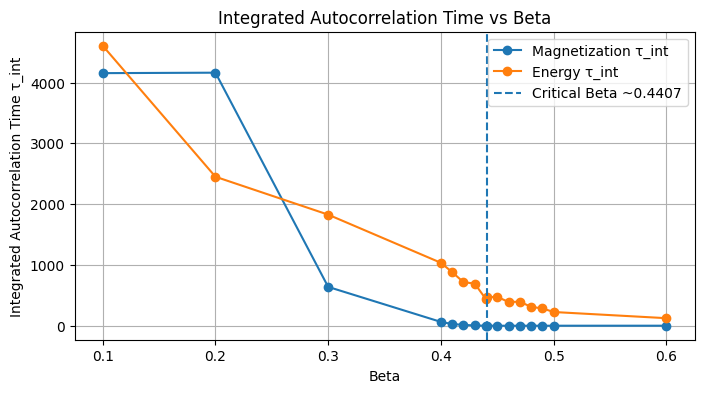

In [32]:
# Plot integrated autocorrelation times vs beta
beta_list = list(simulation_data.keys())
plt.figure(figsize=(8, 4))
plt.plot(beta_list, tau_int_mag_ls, marker='o', label='Magnetization τ_int')
plt.plot(beta_list, tau_int_energy_ls, marker='o', label='Energy τ_int')
plt.title('Integrated Autocorrelation Time vs Beta')
plt.axvline(0.4407, ymin=0, ymax=max(max(tau_int_mag_ls), max(tau_int_energy_ls)), linestyle='--', label='Critical Beta ~0.4407')
plt.xlabel('Beta')
plt.ylabel('Integrated Autocorrelation Time τ_int')
plt.legend()
plt.grid()
plt.show()